# Punto N°1 Procesos Estocásticos

Para $t_1 < t_2 < t_3$ obtenga las propiedades distribucionales de $W_t = B_{t1}B_{t2}B_{t3}$, con $B_t$ como un Movimiento Browniano Estándar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def browniano_estandar(trayectorias, delta):
    browniano = []
    browniano.append(np.zeros(trayectorias))
    for i in range(int(1/delta)):
        B_t = browniano[-1] + np.sqrt(delta) * np.random.normal(0, 1, trayectorias)
        browniano.append(B_t)
    return browniano

def seleccionar_tiempos(t, delta):
    t1 = int(t/delta * 0.3)
    t2 = int(t/delta * 0.6)
    t3 = int(t/delta)
    return t1, t2, t3

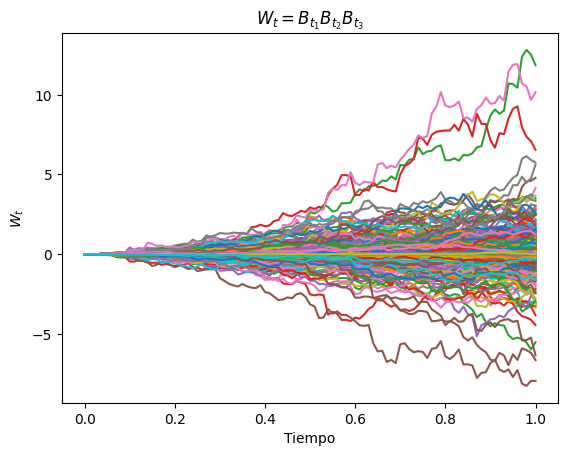

In [4]:
# Parámetros del proceso estocástico
trayectorias = 1000
delta = 0.01

tiempos = np.arange(0, 1+delta, delta)
browniano = browniano_estandar(trayectorias, delta)

W_t = []
for t in tiempos:
    t1, t2, t3 = seleccionar_tiempos(t, delta)
    W_t_inst = browniano[t1] * browniano[t2] * browniano[t3]
    W_t.append(W_t_inst)

plt.plot(tiempos, W_t)
plt.title('$W_t = B_{t_1}B_{t_2}B_{t_3}$')
plt.xlabel('Tiempo')
plt.ylabel('$W_t$')
plt.show()


Esperanza

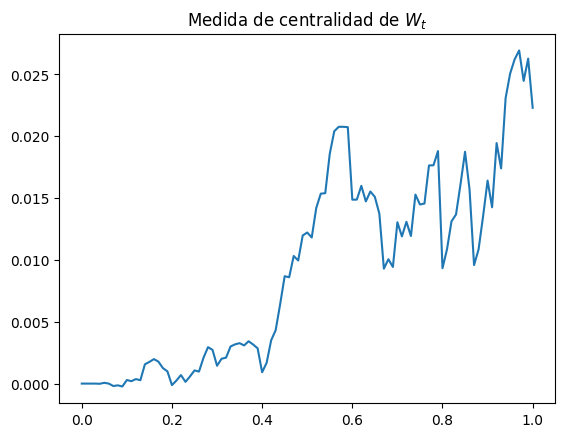

In [5]:
m=[]
for i in W_t:
    m.append(np.mean(i))

tiempos=np.arange(0, 1+delta, delta).tolist()
fig, ax = plt.subplots()
ax.plot(tiempos,m,label='Media simulada')
ax.set_title("Medida de centralidad de $W_t$")
plt.show()

Varianza

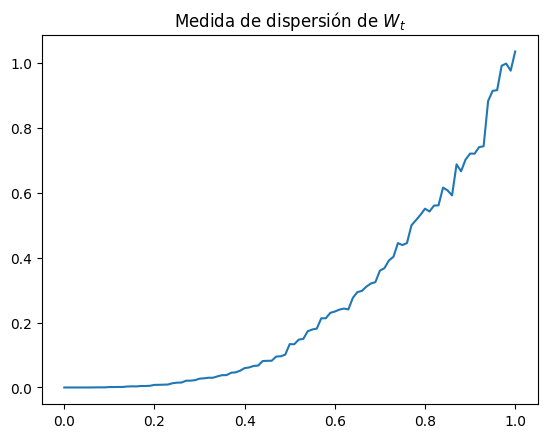

In [7]:
var=[]
for i in W_t:
    var.append(np.var(i))

# Tiempos para la gráfica de la varianza en el punto t
tiempos=np.arange(0, 1+delta, delta).tolist()

fig, ax = plt.subplots()
ax.plot(tiempos,var, label='Varianza simulada')
ax.set_title("Medida de dispersión de $W_t$")
plt.show()

Covarianza

Text(0.5, 0.5, 't')

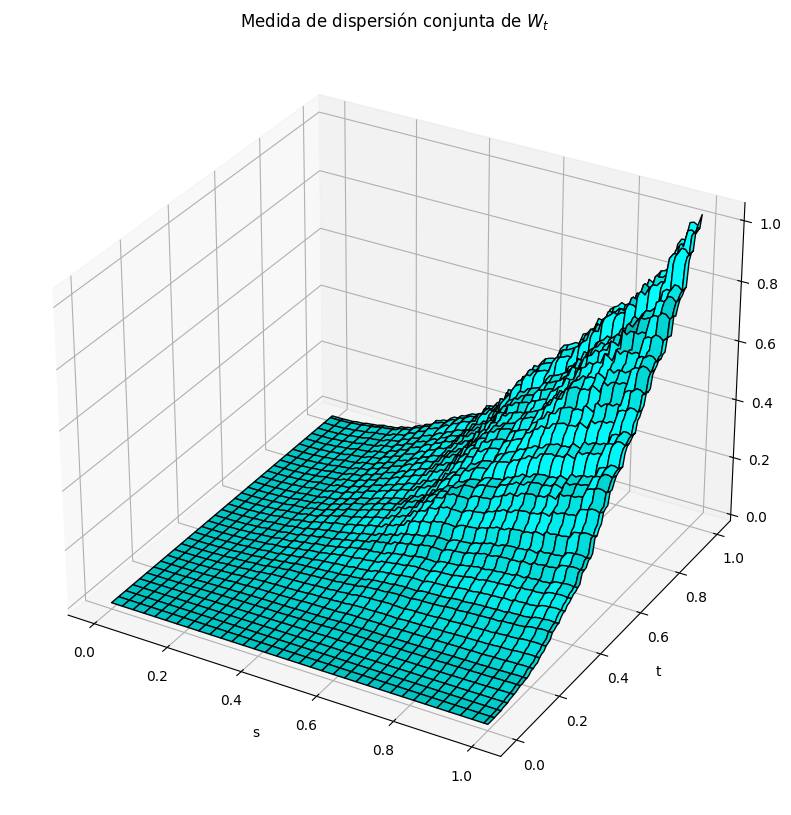

In [9]:
paths=np.array(W_t).transpose()

# Calculamos la matriz de covarianza
cov_matrix=np.cov(paths, rowvar=False)

# Índices de tiempo
s_values=np.arange(0, 1+delta, delta)
s,t=np.meshgrid(s_values, s_values)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(s,t,cov_matrix,color='cyan', edgecolor='k')
ax.set_title('Medida de dispersión conjunta de $W_t$')
ax.set_xlabel('s')
ax.set_ylabel('t')